# MNIST Classification Demo
### Comparing Random Forest, FFNN, and CNN on Handwritten Digit Recognition

This notebook trains and evaluates three different machine learning models on the MNIST dataset.

### 🔹 Models Used:
- 🌲 **Random Forest** (Traditional Machine Learning)
- ⚡ **Feed-Forward Neural Network (FFNN)**
- 🔥 **Convolutional Neural Network (CNN)**

We will:
1. Load and preprocess the MNIST dataset.
2. Train and evaluate **each model sequentially**.
3. Discuss **edge cases** (difficult images for classification).
4. Compare model performance at the end.

## 🔹 Checking Environment and Required Libraries
This section verifies that all necessary libraries are installed and checks the Python interpreter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import sys

print("✅ All required packages are installed and working!")
print("Python Interpreter Path:", sys.executable)


✅ All required packages are installed and working!
Python Interpreter Path: F:\gitRepo\internship-test\task1_image_classification\venv\Scripts\python.exe


## 🔹 Loading and Preprocessing MNIST Dataset
This section:
- Loads the MNIST dataset.
- Normalizes pixel values to [0,1].
- Reshapes data for CNN models.

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize data (scale pixel values to [0,1])
X_train = X_train / 255.0
X_test = X_test / 255.0

# Prepare CNN data (reshape to add a single channel)
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

print("✅ MNIST dataset loaded and normalized successfully!")


✅ MNIST dataset loaded and normalized successfully!


## 🌲 Training and Evaluating Random Forest
This section:
- Flattens the images for Random Forest.
- Trains a Random Forest model.
- Evaluates and prints accuracy.

In [3]:
sys.path.append("F:/gitRepo/internship-test/task1_image_classification/src")
from rf_model import RandomForestModel

# Prepare Random Forest data (flatten images)
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)

print("🔥 Training Random Forest Model...")
rf_model = RandomForestModel()
rf_model.train(X_train_rf, y_train)

# Predict & Evaluate
rf_predictions = rf_model.predict(X_test_rf)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"🌲 Random Forest Accuracy: {rf_accuracy:.4f}")


🔥 Training Random Forest Model...
🌲 Random Forest Accuracy: 0.9691


## ⚡ Training and Evaluating Feed-Forward Neural Network (FFNN)
This section:
- Trains an FFNN model on MNIST.
- Evaluates and prints accuracy.

In [6]:
from ffnn_model import FFNNModel

print("\n⚡ Training Feed-Forward Neural Network (FFNN)...")

# ✅ Flatten images before training
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Shape (60000, 784)
X_test_flat = X_test.reshape(X_test.shape[0], -1)  # Shape (10000, 784)

# Debugging: Print data shapes before training
print(f"🔹 X_train shape (before flattening): {X_train.shape}")
print(f"🔹 X_train_flat shape (after flattening): {X_train_flat.shape}")
print(f"🔹 X_test_flat shape: {X_test_flat.shape}")

# Instantiate FFNN model
ffnn_model = FFNNModel()

# Debugging: Print expected input shape
print(f"✅ FFNN Model Expected Input Shape: {ffnn_model.model.input_shape}")

# Train the FFNN model
ffnn_model.train(X_train_flat, y_train)
print("✅ FFNN Training Completed Successfully!\n")

# Predict on the test set
print("📊 Evaluating FFNN Model...")
ffnn_predictions = ffnn_model.predict(X_test_flat)

# Compute accuracy
ffnn_accuracy = accuracy_score(y_test, ffnn_predictions)
print(f"⚡ FFNN Model Accuracy: {ffnn_accuracy:.4f}")

# Confirm execution completion
print("\n✅ FFNN Model Training & Evaluation Completed!")


⚡ Training Feed-Forward Neural Network (FFNN)...
🔹 X_train shape (before flattening): (60000, 28, 28)
🔹 X_train_flat shape (after flattening): (60000, 784)
🔹 X_test_flat shape: (10000, 784)
✅ FFNN Model Built. Expected Input Shape: (None, 784)
✅ FFNN Model Expected Input Shape: (None, 784)
🔹 Training Data Shape: (60000, 784)
🔹 y_train one-hot encoded shape: (60000, 10)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8749 - loss: 0.4407
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9627 - loss: 0.1241
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9761 - loss: 0.0816
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9819 - loss: 0.0590
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - accuracy: 0.9864 - loss: 0.0430
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9890 - loss: 0.0337
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9910 - loss: 0.0289
Epoc

## 🔥 Training and Evaluating Convolutional Neural Network (CNN)
This section:
- Trains a CNN model.
- Evaluates and prints accuracy.

In [7]:
from cnn_model import CNNModel

print("🔥 Training Convolutional Neural Network (CNN)...")
cnn_model = CNNModel()
cnn_model.train(X_train_cnn, y_train)

# Predict & Evaluate
cnn_predictions = cnn_model.predict(X_test_cnn)
cnn_accuracy = accuracy_score(y_test, cnn_predictions)
print(f"🔥 CNN Accuracy: {cnn_accuracy:.4f}")


🔥 Training Convolutional Neural Network (CNN)...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9115 - loss: 0.3013 
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9799 - loss: 0.0663 
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 120s 64ms/step - accuracy: 0.9857 - loss: 0.0494
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 170s 79ms/step - accuracy: 0.9886 - loss: 0.0399
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 177s 66ms/step - accuracy: 0.9903 - loss: 0.0333
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 163s 87ms/step - accuracy: 0.9906 - loss: 0.0321
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 71ms/step - accuracy: 0.9921 - loss: 0.0271
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 113s 60ms/step - accuracy: 0.9923 - loss: 0.0238
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 71ms/step - accuracy: 0.9942 - loss: 0.0199
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 117s 62ms/step - accuracy: 0.9946 - loss: 0.0184
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/ste

## 📊 Comparing Model Predictions on the Same Image
This section:
- Selects a **random test image**.
- Displays how **each model (RF, FFNN, CNN) classified it**.

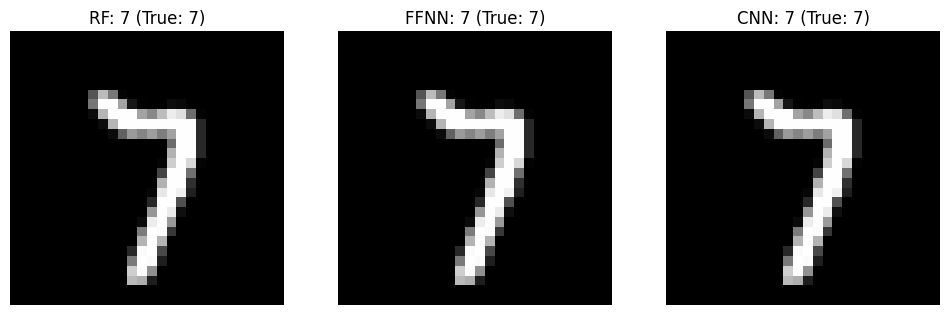

In [8]:
import random

sample_index = random.randint(0, len(X_test) - 1)

# Plot results for all models
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(X_test[sample_index], cmap='gray')
plt.title(f"RF: {rf_predictions[sample_index]} (True: {y_test[sample_index]})")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(X_test[sample_index], cmap='gray')
plt.title(f"FFNN: {ffnn_predictions[sample_index]} (True: {y_test[sample_index]})")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(X_test[sample_index], cmap='gray')
plt.title(f"CNN: {cnn_predictions[sample_index]} (True: {y_test[sample_index]})")
plt.axis("off")

plt.show()


#  **EDGE CASE ANALYSIS**


## 🔥 1. Most Confident Wrong Predictions
This method **identifies cases where the CNN was very confident, but still wrong**.

### **Why This Matters?**
- Some mistakes are caused by the model **being too confident in a wrong answer**.
- This helps **debug overconfidence issues**.
- It tells us whether the model needs **better calibration**.

### **How It Works?**
1. **Get the model’s confidence score (softmax probability) for each test image**.
2. **Select the misclassified images where CNN had the highest confidence**.
3. **Display these images with their incorrect predictions**.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


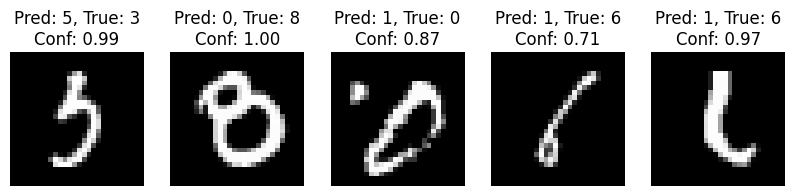

⚠️ These are the **most confident** incorrect predictions.


In [9]:
# Get softmax probabilities from CNN
softmax_outputs = cnn_model.model.predict(X_test_cnn)

# Find misclassified images
misclassified_indices = np.where(cnn_predictions != y_test)[0]

# Get confidence scores for misclassified images
misclassified_confidence = softmax_outputs[misclassified_indices, cnn_predictions[misclassified_indices]]

# Select top 5 most confident wrong predictions
top_misclassified = misclassified_indices[np.argsort(-misclassified_confidence)[:5]]

# Display most confident wrong predictions
plt.figure(figsize=(10, 5))
for i, index in enumerate(top_misclassified):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"Pred: {cnn_predictions[index]}, True: {y_test[index]}\nConf: {misclassified_confidence[i]:.2f}")
    plt.axis("off")
plt.show()

print("⚠️ These are the **most confident** incorrect predictions.")

## 🔍 2. Commonly Confused Digits
This method finds **digits that are often mistaken for one another**.

### **Why This Matters?**
- Some digits look similar (e.g., `1` vs `7`, `4` vs `9`).
- If CNN frequently makes these mistakes, **we may need better training data**.
- Helps us **identify systematic errors** in digit classification.

### **How It Works?**
1. **Define common confusion pairs** (e.g., `1` vs `7`, `4` vs `9`).
2. **Find misclassified images where the model made these mistakes**.
3. **Display these images to analyze why CNN struggles with them**.


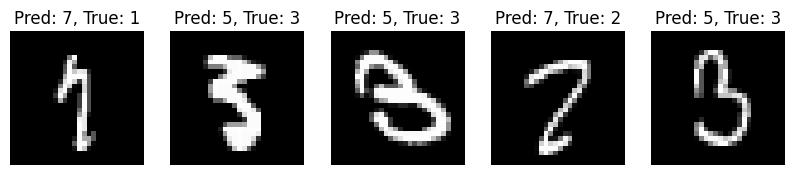

⚠️ CNN struggled with **similar-looking digits**.


In [10]:
# Define common confusion pairs
confusion_pairs = [(1, 7), (4, 9), (3, 5), (8, 3), (2, 7)]

# Find misclassified samples in confusion pairs
filtered_indices = [i for i in misclassified_indices if (y_test[i], cnn_predictions[i]) in confusion_pairs]

# Select up to 5 samples
selected_samples = np.random.choice(filtered_indices, min(5, len(filtered_indices)), replace=False)

# Display images
plt.figure(figsize=(10, 5))
for i, index in enumerate(selected_samples):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"Pred: {cnn_predictions[index]}, True: {y_test[index]}")
    plt.axis("off")
plt.show()

print("⚠️ CNN struggled with **similar-looking digits**.")

## 🏴 3. Blurry or Incomplete Digits
This method finds **digits that are blurry, low-contrast, or hard to read**.

### **Why This Matters?**
- Some images are **noisy or incomplete**, making classification difficult.
- If CNN struggles with these, we may need **better data preprocessing**.
- Helps identify **real-world issues with poor-quality images**.

### **How It Works?**
1. **Compute pixel intensity variance** (sharp images have high variance, blurry images have low variance).
2. **Select misclassified images with the lowest variance**.
3. **Display these images to analyze how CNN handles unclear digits**.

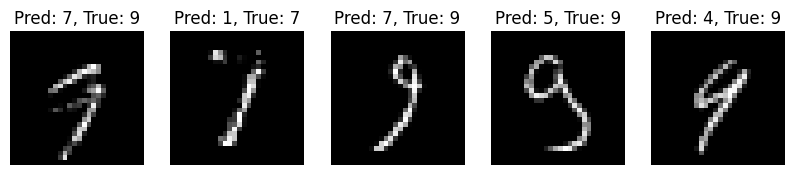

⚠️ CNN struggled with **blurry or unclear digits**.


In [11]:
# Compute pixel intensity variance for each test image (to detect blurry digits)
image_variance = np.var(X_test.reshape(X_test.shape[0], -1), axis=1)

# Select misclassified images with low variance (blurry images)
blurry_misclassified = misclassified_indices[np.argsort(image_variance[misclassified_indices])[:5]]

# Display blurry misclassified images
plt.figure(figsize=(10, 5))
for i, index in enumerate(blurry_misclassified):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"Pred: {cnn_predictions[index]}, True: {y_test[index]}")
    plt.axis("off")
plt.show()

print("⚠️ CNN struggled with **blurry or unclear digits**.")

## 📊 Final Model Comparison
This section prints the final test accuracy for each model.

In [12]:
print("📊 Final Model Comparison:")

if "rf_accuracy" in locals():
    print(f"🌲 Random Forest: {rf_accuracy:.4f}")
else:
    print("⚠️ Random Forest model was not trained.")

if "ffnn_accuracy" in locals():
    print(f"⚡ FFNN: {ffnn_accuracy:.4f}")
else:
    print("⚠️ FFNN model was not trained.")

if "cnn_accuracy" in locals():
    print(f"🔥 CNN: {cnn_accuracy:.4f}")
else:
    print("⚠️ CNN model was not trained.")

📊 Final Model Comparison:
🌲 Random Forest: 0.9691
⚡ FFNN: 0.9771
🔥 CNN: 0.9922
